In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

import matplotlib
%matplotlib inline
color = '#ff661f'
cmap1 = 'Oranges'
cmap2 =  'Set3'
palette1 = 'Oranges'
palette2 = 'Set3'


import warnings 
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("/home/enes/Desktop/GDZ_datathon/gdz_merge_data.csv")
df['tarih'] = pd.to_datetime(df['tarih'])

In [3]:
df.head()

,Yıl,Ay,Gün,lat,lon,t_2m_C,effective_cloud_cover_p,global_rad_W,relative_humidity_2m_p,wind_dir_10m_d,...,t_apparent_C,Bayram_Flag,bildirimsiz_sum,bildirimli_sum,gun_adi,il,ilcee,gun_tipi,sicaklik_fark,ruzgar_yonu
0,2021,1,1,38.7996,26.9707,13.275000,55.045833,73.020833,85.991667,167.204167,...,13.929167,New Year's Day,5,0,Friday,izmir,aliaga,Haftaiçi,-0.654167,Güneydoğu
1,2021,1,2,38.7996,26.9707,12.870833,36.125000,92.858333,82.137500,106.650000,...,13.645833,NaN,13,0,Saturday,izmir,aliaga,Haftasonu,-0.775000,Doğu
2,2021,1,3,38.7996,26.9707,12.633333,64.870833,39.266667,79.120833,122.520833,...,12.845833,NaN,4,0,Sunday,izmir,aliaga,Haftasonu,-0.212500,Doğu
3,2021,1,4,38.7996,26.9707,13.733333,47.783333,78.945833,70.312500,123.408333,...,13.775000,NaN,9,0,Monday,izmir,aliaga,Haftaiçi,-0.041667,Doğu
4,2021,1,5,38.7996,26.9707,14.375000,30.379167,95.716667,75.220833,195.720833,...,14.900000,NaN,2,0,Tuesday,izmir,aliaga,Haftaiçi,-0.525000,Güney


In [5]:
df.shape

(48148, 22)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48148 entries, 0 to 48147
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yıl                      48148 non-null  int64  
 1   Ay                       48148 non-null  int64  
 2   Gün                      48148 non-null  int64  
 3   lat                      48148 non-null  float64
 4   lon                      48148 non-null  float64
 5   t_2m_C                   48148 non-null  float64
 6   effective_cloud_cover_p  48148 non-null  float64
 7   global_rad_W             48148 non-null  float64
 8   relative_humidity_2m_p   48148 non-null  float64
 9   wind_dir_10m_d           48148 non-null  float64
 10  wind_speed_10m_ms        48148 non-null  float64
 11  prob_precip_1h_p         48148 non-null  float64
 12  t_apparent_C             48148 non-null  float64
 13  Bayram_Flag              1698 non-null   object 
 14  tarih                 

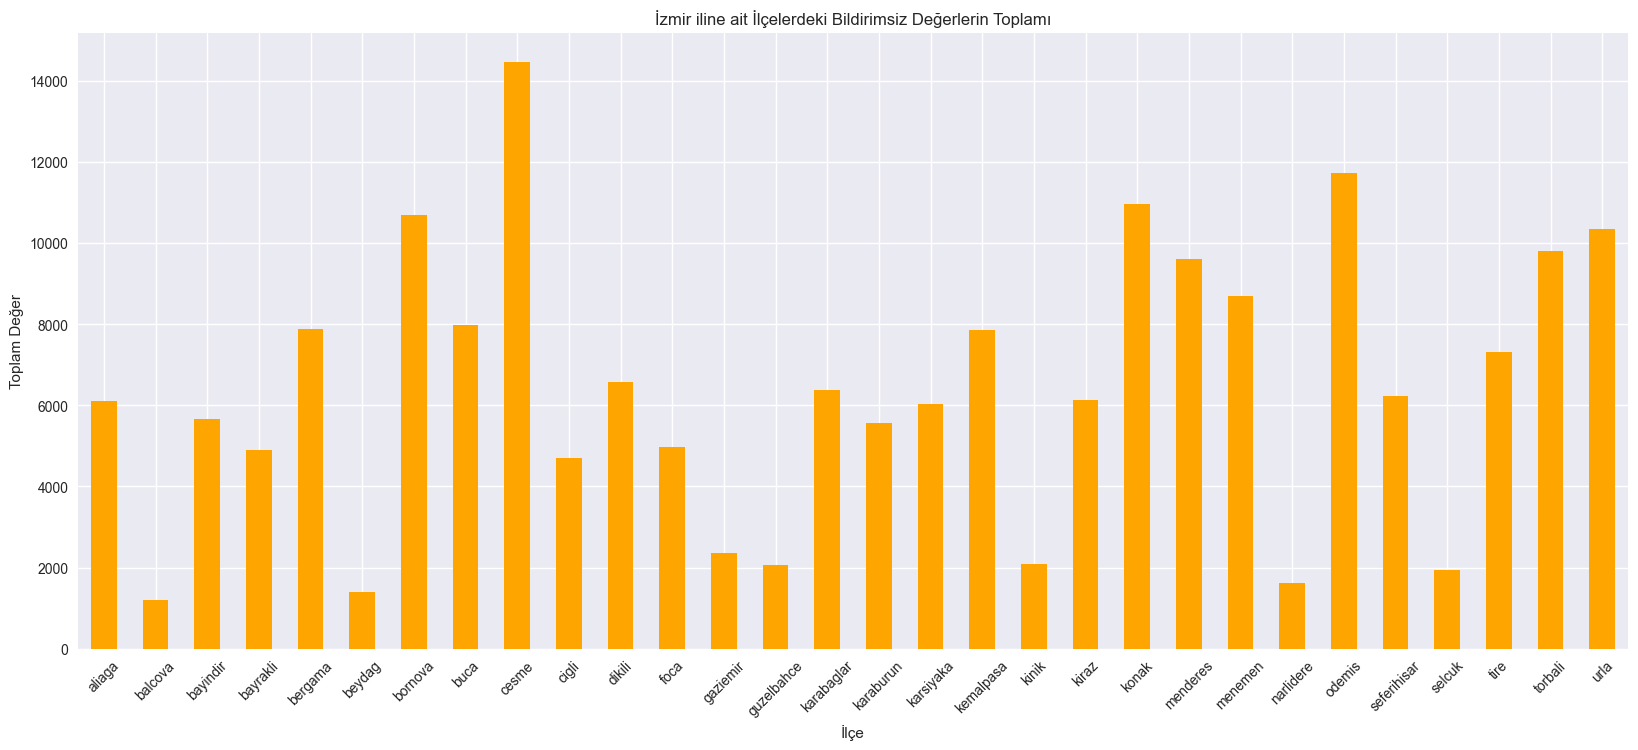

In [12]:
# izmir bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'izmir']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce') 

df_grouped = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()

plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
df_grouped.plot(kind='bar', color='orange')
plt.title('İzmir iline ait İlçelerdeki Bildirimsiz Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değer')
plt.xticks(rotation=45)
plt.show()

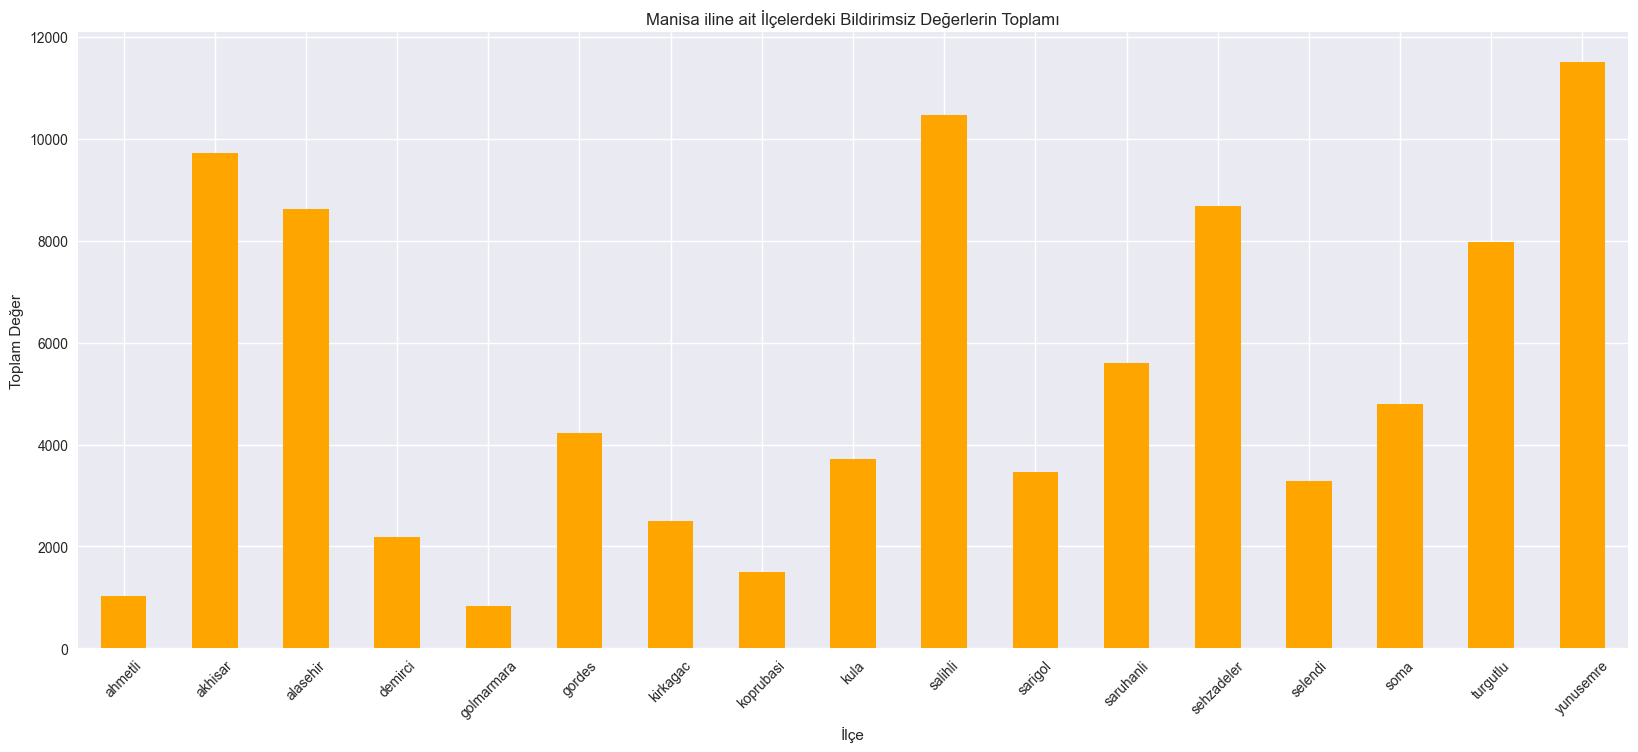

In [16]:
# manisa bildirimsiz sum toplamı
df_filtered = df[df['il'] == 'manisa']
df_filtered['bildirimsiz_sum'] = pd.to_numeric(df_filtered['bildirimsiz_sum'], errors='coerce')

df_grouped = df_filtered.groupby('ilcee')['bildirimsiz_sum'].sum()

plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
df_grouped.plot(kind='bar', color='orange')
plt.title('Manisa iline ait İlçelerdeki Bildirimsiz Değerlerin Toplamı')
plt.xlabel('İlçe')
plt.ylabel('Toplam Değer')
plt.xticks(rotation=45)
plt.show()

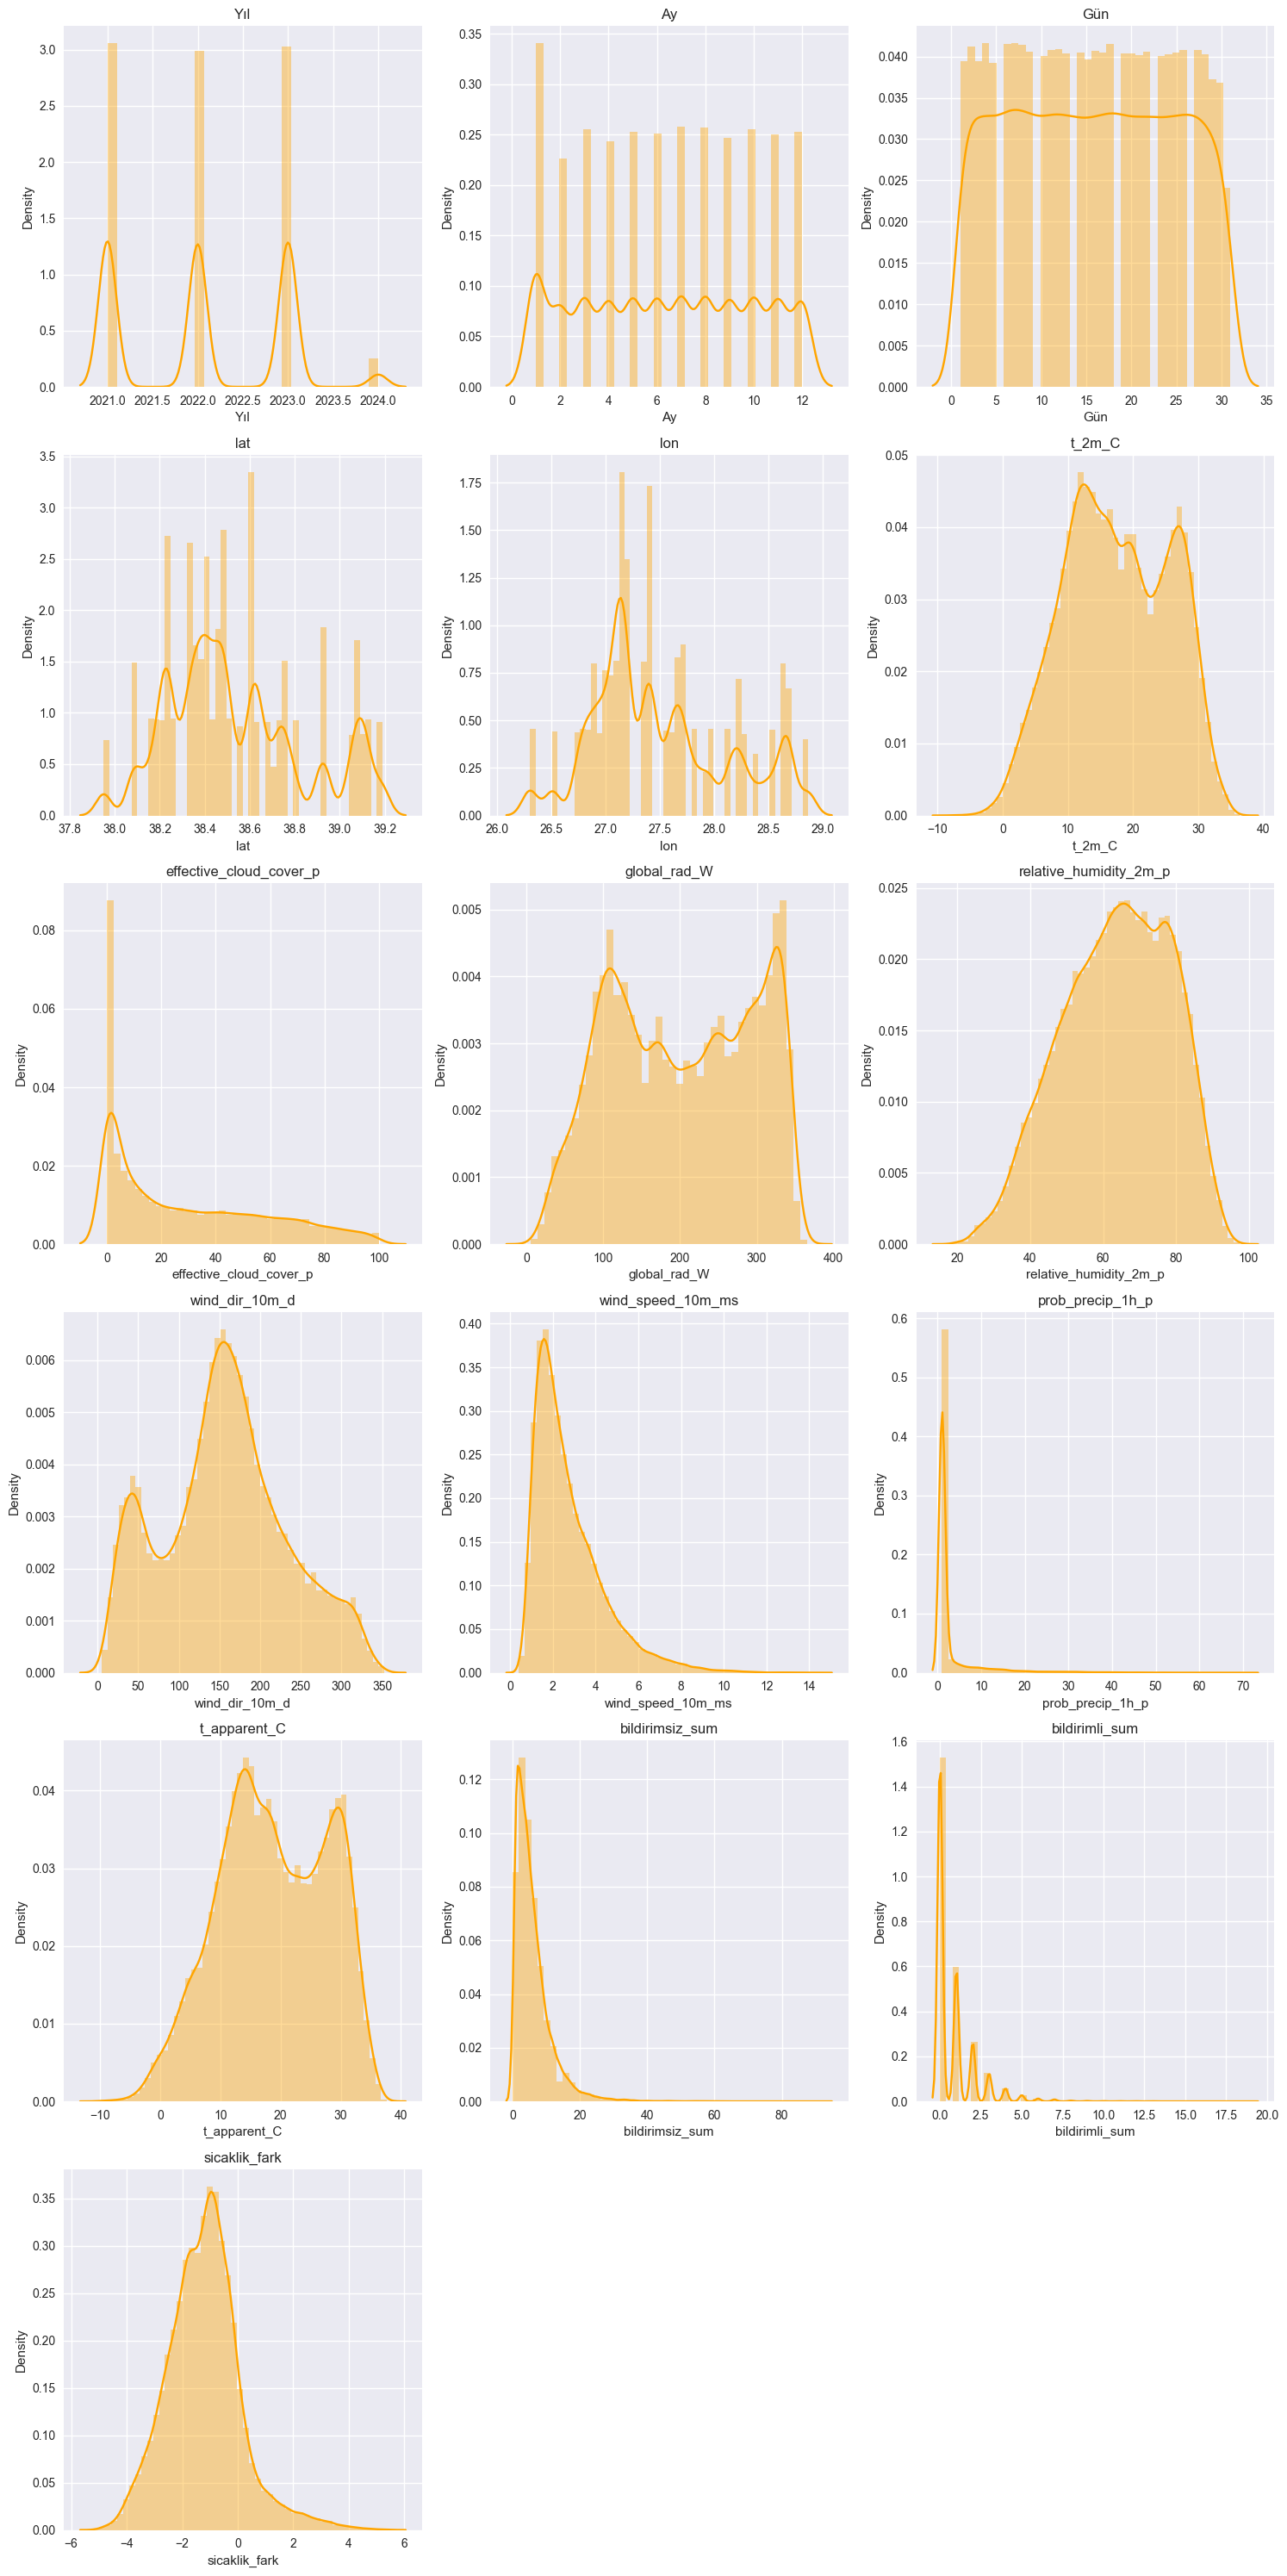

In [19]:

numeric_columns = df.select_dtypes(include=['float', 'int']).columns

n_rows = (len(numeric_columns) - 1) // 3 + 1
n_cols = min(len(numeric_columns), 3)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, column in enumerate(numeric_columns):
    row = i // n_cols
    col = i % n_cols
    sns.distplot(df[column], ax=axes[row, col], color='orange')
    axes[row, col].set_title(column, size=12)
    axes[row, col].grid(True)

for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [36]:
df.isnull().sum()

Yıl                            0
Ay                             0
Gün                            0
lat                            0
lon                            0
t_2m_C                         0
effective_cloud_cover_p        0
global_rad_W                   0
relative_humidity_2m_p         0
wind_dir_10m_d                 0
wind_speed_10m_ms              0
prob_precip_1h_p               0
t_apparent_C                   0
Bayram_Flag                46450
bildirimsiz_sum                0
bildirimli_sum                 0
gun_adi                        0
il                             0
ilcee                          0
gun_tipi                       0
sicaklik_fark                  0
ruzgar_yonu                    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# Önce sütunu indeks olarak ayarlayalım
df['tarih'] = pd.to_datetime(df['tarih'])  # 'tarih' sütununu datetime nesnelerine dönüştür
df.set_index('tarih', inplace=True)  # 'tarih' sütununu indeks olarak ayarla

# 'bildirimli_sum' sütununu zaman serisi olarak çizgi grafiği olarak göster
plt.figure(figsize=(10, 6))
df['bildirimli_sum'].plot(color='blue', linewidth=2)
plt.title('Bildirimli Sum Değişkeni Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Bildirimli Sum Değeri')
plt.grid(True)
plt.show()


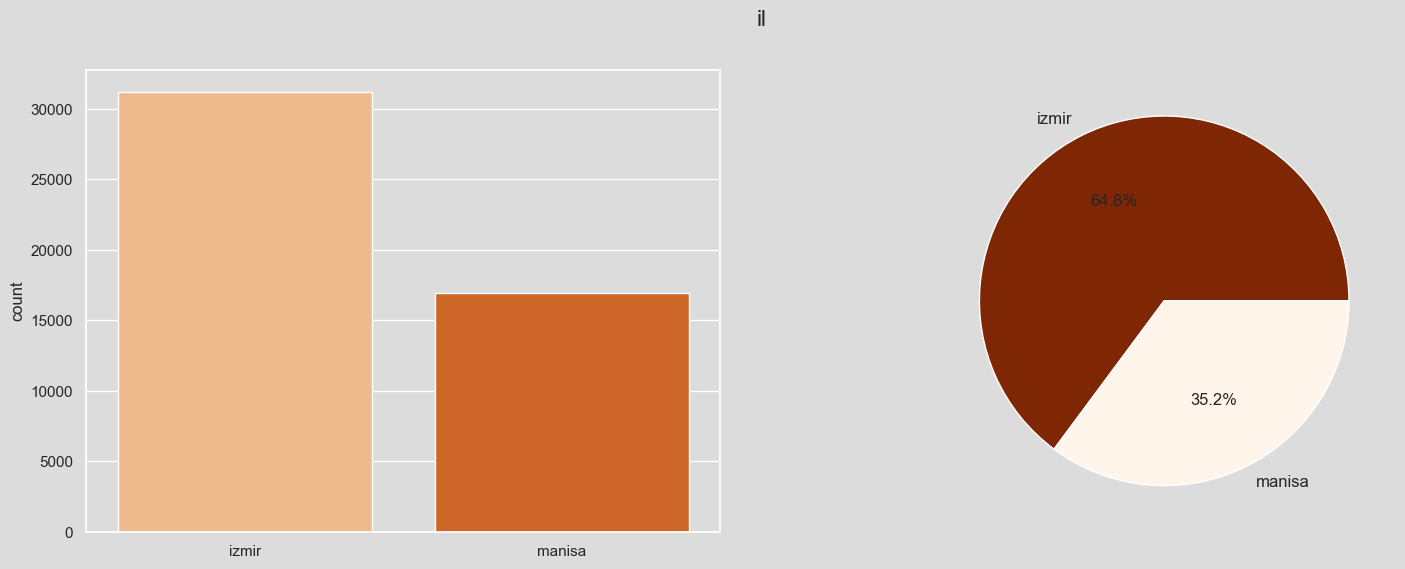

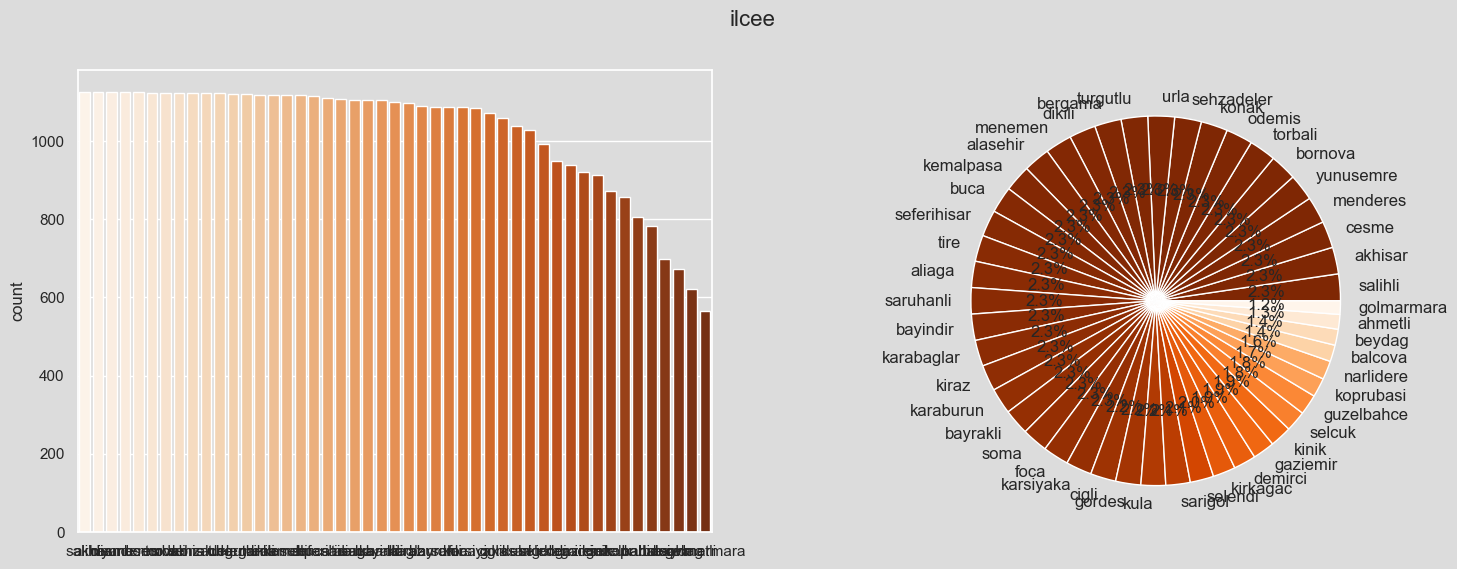

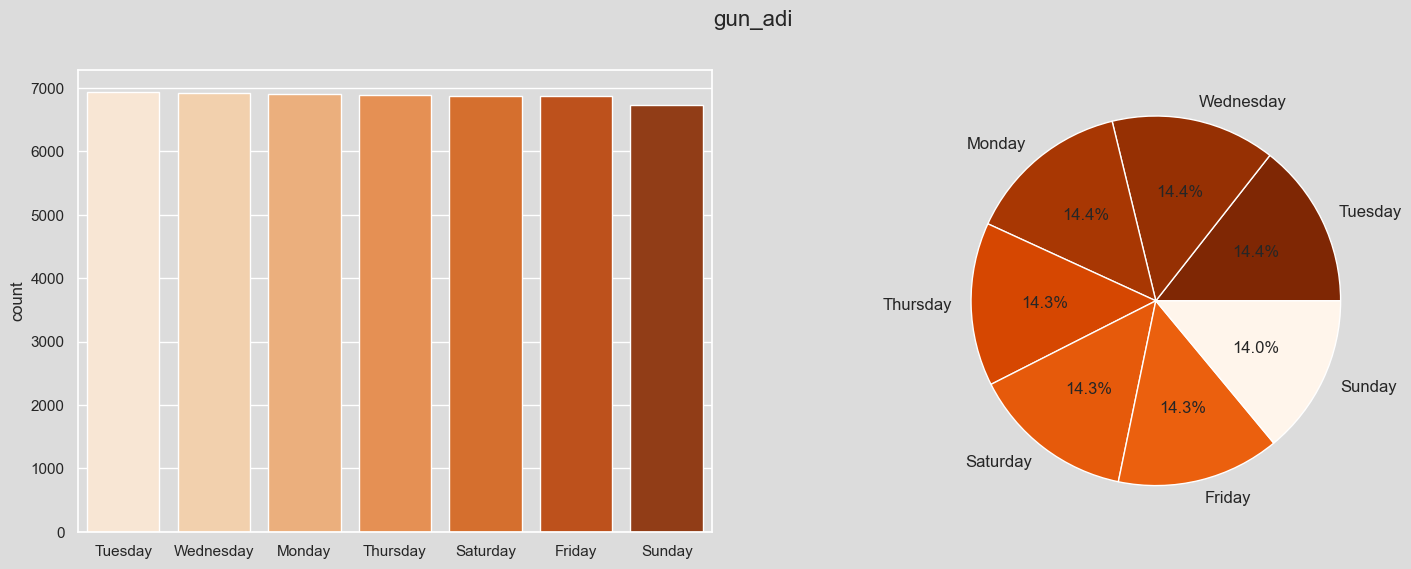

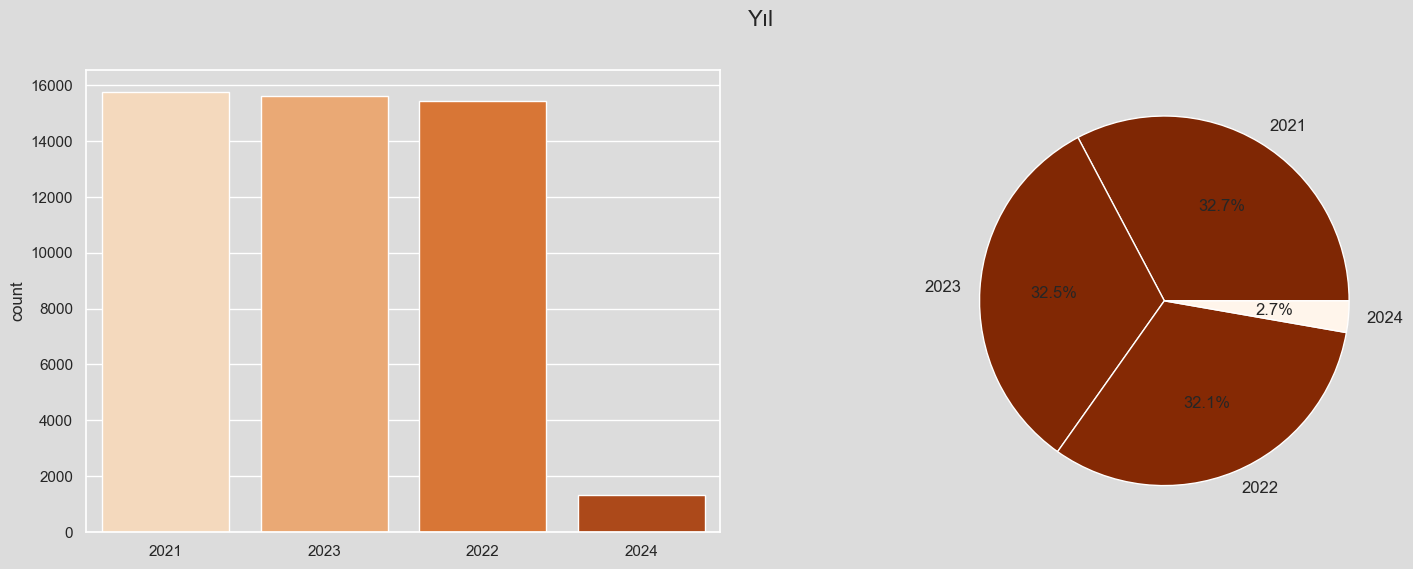

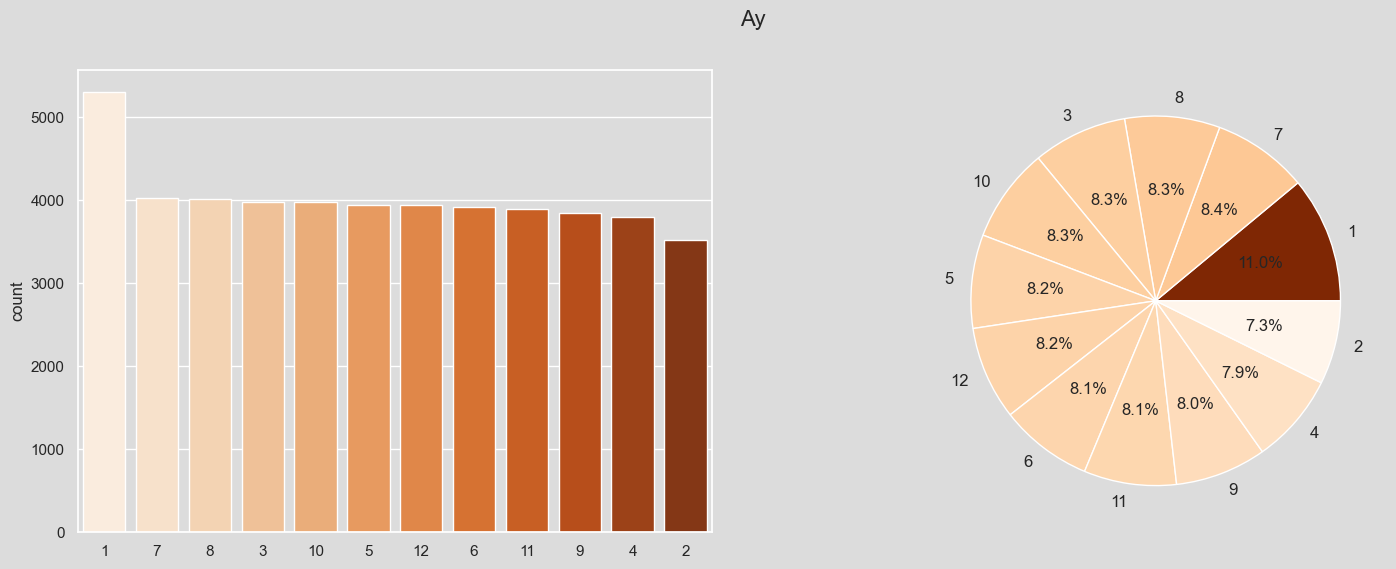

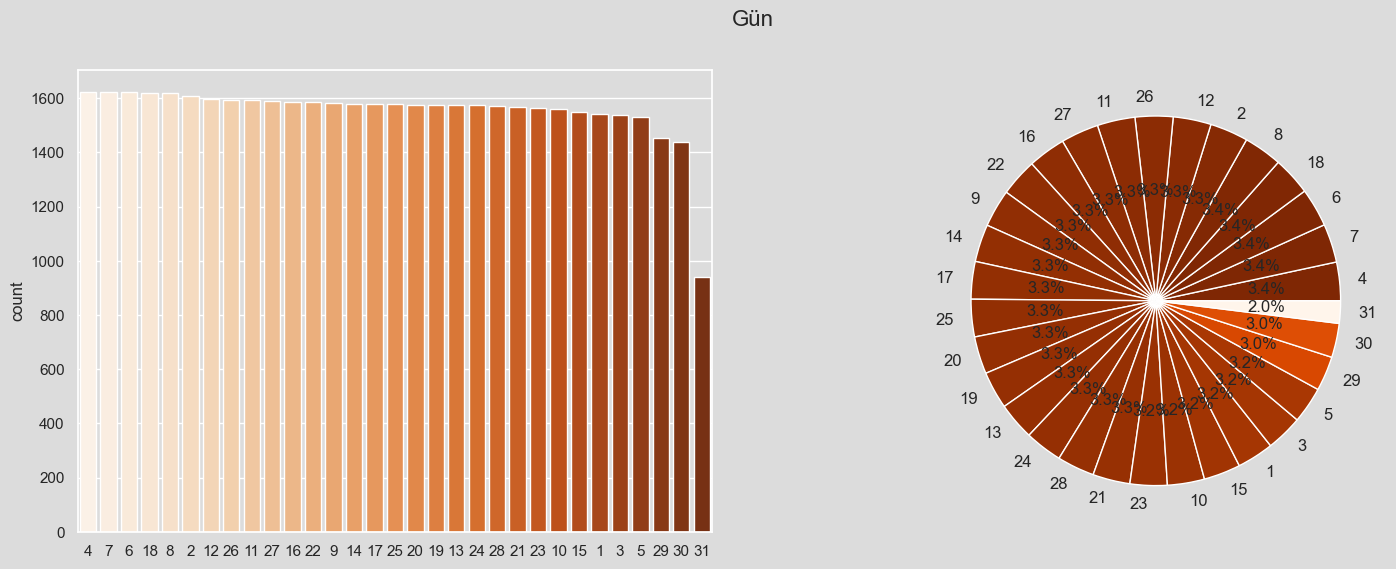

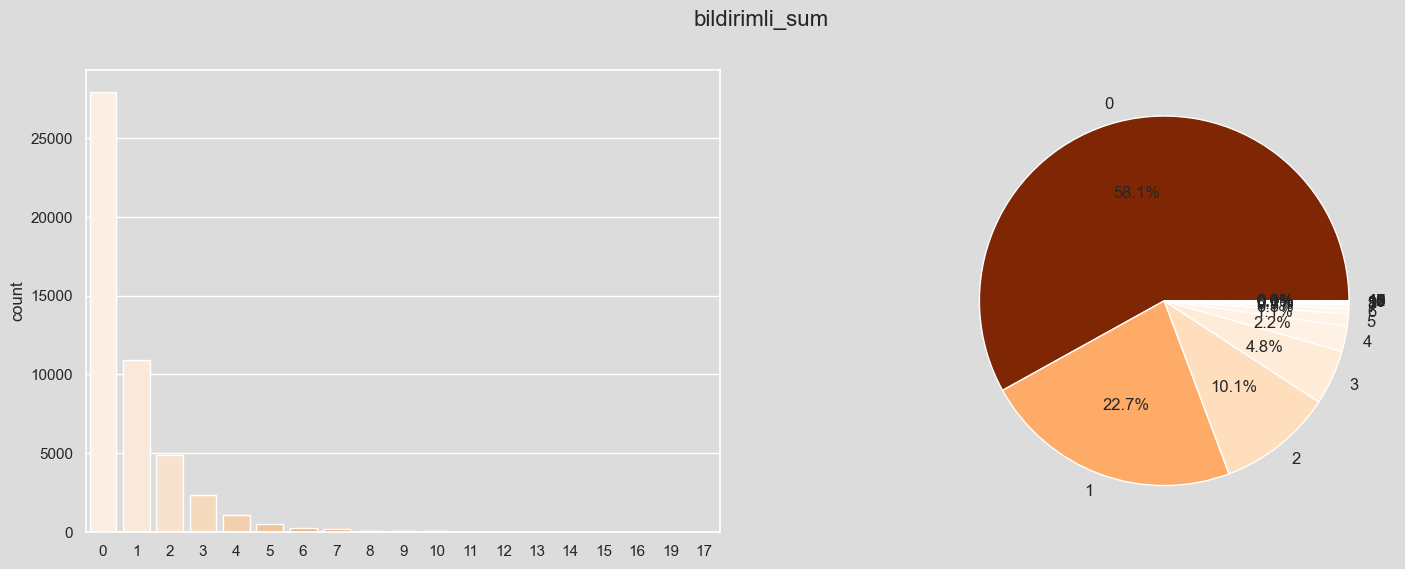

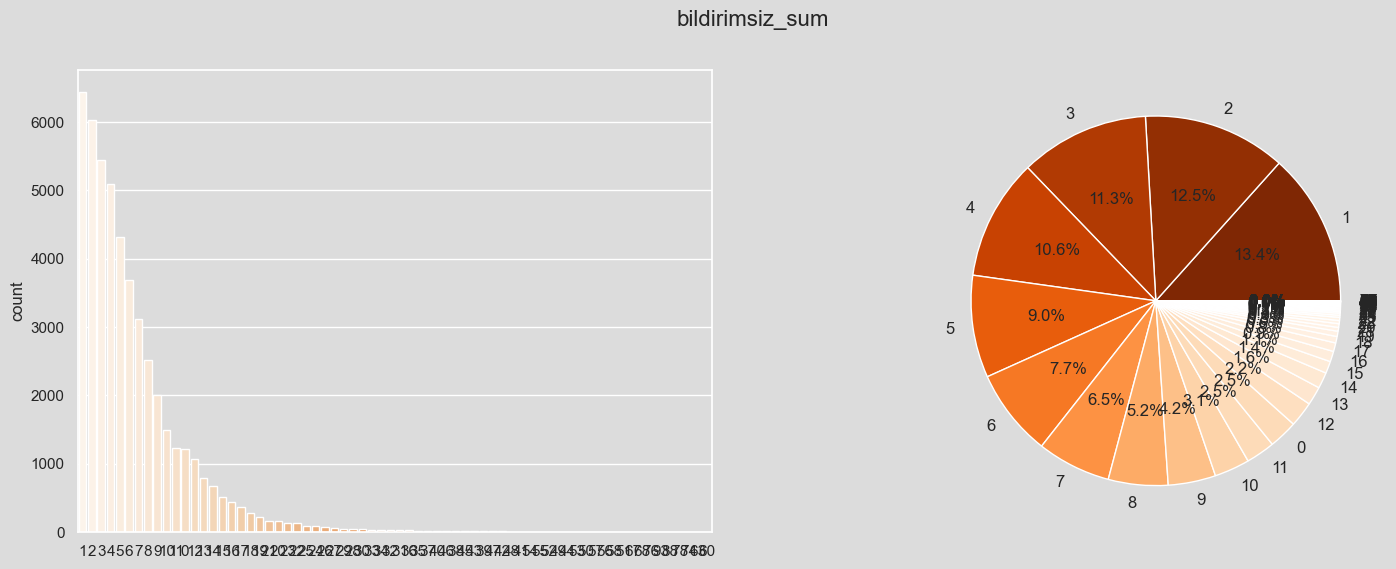

In [45]:
def cat_analyser(data, col, freq_limit = 100):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()

cat_cols = ['il',
            'ilcee',
            'gun_adi',
            'Yıl',
            'Ay',
            'Gün',
            #'SÜREYE_GÖRE',
            'bildirimli_sum',
            'bildirimsiz_sum']
for col in cat_cols:
    cat_analyser(df, col)

In [63]:
def date_analyser(dataframe, date_col):
    df_ = dataframe.copy()
    df_['date'] = df_[date_col].dt.date
    df_grouped = df_.groupby('date').size(). \
    to_frame('count').reset_index().sort_values('date')
    data = go.Scatter(x = df_grouped['date'],
                      y = df_grouped['count'],
                      mode = 'lines',
                      name = 'Number of Power Outages',
                      marker = dict(color = color))
    layout = go.Layout(title={'text': "Number of Power Outages by Dates",
                              'y':0.9,
                              'x':0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                       xaxis = dict(title = 'Date'),
                       yaxis = dict(title = 'Power Outages'),
                       template = 'plotly_white')
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

date_analyser(df, 'tarih')

In [66]:
def cat_date_analyser(dataframe, cat_col, date_col):
    df_ = dataframe.copy()
    data = list()
    df_['date'] = df_[date_col].dt.date
    for value in df_[cat_col].unique():
        df_cat = df_.loc[df_[cat_col] == value]
        df_grouped = df_cat.groupby('date').size(). \
        to_frame('count').reset_index().sort_values('date')
        data.append(go.Scatter(x = df_grouped['date'],
                               y = df_grouped['count'],
                               mode = 'lines',
                               name = value,
                               showlegend = True)
                   )
    layout = go.Layout(title = {'text': "Number of Power Outages by Dates",
                                'y':0.9,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top',
                               },
                       legend = dict(x = 0.9,
                                     y = 0.95,
                                     bgcolor = 'rgba(255, 255, 255, 0)',
                                     bordercolor = 'rgba(255, 255, 255, 0)',
                                     title = cat_col),
                       xaxis = dict(title = 'Date'),
                       yaxis = dict(title = 'Power Outages'),
                       template = 'plotly_white')
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

cat_date_analyser(df, 'il', 'tarih')